In [13]:
import pandas as pd
from IPython.core.pylabtools import figsize
from sklearn.metrics import f1_score,confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('always') 
import seaborn as sns
sns.set(font_scale = 1)
from sklearn.metrics import roc_auc_score, mean_squared_error,mean_absolute_error,recall_score,max_error,f1_score, accuracy_score,confusion_matrix,r2_score,f1_score,precision_score

def evaluate(y_test, model_pred):  
    #model_pred=pro_pred(model_pred)
    #model_mae = mean_absolute_error(y_test.astype(np.float32), model_pred.astype(np.float32))
    model_mae = mean_absolute_error(y_test, model_pred)
    model_mse = mean_squared_error(y_test, model_pred)
    model_r2_score= r2_score(y_test, model_pred)
    ac_score=  accuracy_score(y_test, model_pred)
    #accuracy = np.sum(model_pred == y_test) / y_test.shape[0]
    #print('Test accuracy = {}'.format(accuracy))
    #model_f1_score_w= f1_score(y_test, model_pred, average='weighted')
    precision_w=  precision_score(y_test, model_pred, average='weighted',zero_division=1)
    rec_s_w=recall_score(y_test, model_pred, average='weighted',zero_division=1)
    
    model_f1_score_ma= f1_score(y_test, model_pred, average='macro')
    rmse=mean_squared_error(y_test, model_pred, squared=False)
    #precision_ma=  precision_score(y_test, model_pred, average='macro')
    rec_s_ma=recall_score(y_test, model_pred, average='macro',zero_division=1)
    
    return model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,rec_s_w,model_f1_score_ma,rec_s_ma

def plot(model_comparison,model_name):
    columns=model_comparison.columns
    print(columns)

    for i, each in enumerate(columns):
        if not each==model_name :
            each_list=model_comparison[each]
            model_comparison.sort_values(each, ascending = True).plot(x = model_name, y = each, kind = 'barh',
                                                               color = 'green', edgecolor = 'black')
            plt.ylabel('');
            plt.yticks(size = 14);
            plt.xlabel(each); plt.xticks(size = 14)
            plt.title('Model Comparison on '+each, size = 16);

In [14]:
pre_targets='location_no'#1-10
#pre_targets='floor_no' #0-4
sample='1m'

sk_results_small=pd.read_csv('DB/result/sk_allData_resample_'+sample+'_'+pre_targets+'.csv')
#sk_results_small

print(pd.value_counts(sk_results_small['origin'].values))

if pre_targets=='location_no':
        for i, each in enumerate(sk_results_small.columns):
            sk_results_small.loc[(sk_results_small[each] <1)]=1
            sk_results_small.loc[(sk_results_small[each] >10)]=10
else:
    for i, each in enumerate(sk_results_small.columns):
        sk_results_small.loc[(sk_results_small[each] <0)]=0
        sk_results_small.loc[(sk_results_small[each] >4)]=4
            
#cols=['model'+sample,'mae', 'mse','rmse','r2_score','ac_score','precision','recall_w','f1_score_mi','recall_ma']
cols=['model'+sample,'mae', 'ac_score','f1_score_mac']
model_comparison = pd.DataFrame(columns=cols)

#columns=['xgbtc','rf','RandSearch_best','DTree','lgbm','adb','knn']
columns=['origin', 'adb', 'DTree', 'xgbtc', 'lgbm', 'rf', 'knn',
       'RandSearch_best', 'gb_C', 'gtbc_best', 'gtbc_grid_best']
print(sk_results_small.columns)
#for i, each in enumerate(sk_results_small.columns):
for i, each in enumerate(columns):
    #print(sk_results_small[each].unique())
    #knn_cnf_matrix= confusion_matrix(np.array(sk_results_small['Original']), np.array(sk_results_small[each]))
    model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,reca_s_w,f1_score_ma,reca_s_ma=evaluate(np.array(sk_results_small['origin']), np.array(sk_results_small[each]))
    #newrow = pd.DataFrame([[each,model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,reca_s_w,f1_score_ma,reca_s_ma]], columns=cols)
    newrow = pd.DataFrame([[each,model_mae, ac_score,f1_score_ma]], columns=cols)
    model_comparison = model_comparison.append(newrow).round(2)

#model_comparison= model_comparison[model_comparison['model'+sample] != 'origin']
model_comparison.sort_values(by=['ac_score', 'f1_score_mac'],ascending = False)
model_comparison
#model_comparison.to_csv('DB/result/comparison/'+pre_targets+sample+'.csv', index = False)

9     58304
1     58256
5     46744
10    46057
4     37889
8     34336
7     33982
6     32046
2     22083
3      7511
dtype: int64
Index(['origin', 'adb', 'DTree', 'xgbtc', 'lgbm', 'rf', 'knn',
       'RandSearch_best', 'gb_C', 'gtbc_best', 'gtbc_grid_best', 'gbc'],
      dtype='object')


,model1m,mae,ac_score,f1_score_mac
0,origin,0.00,1.00,1.00
0,adb,1.09,0.73,0.65
0,DTree,0.00,1.00,1.00
0,xgbtc,0.00,1.00,1.00
0,lgbm,0.00,1.00,1.00
0,rf,0.00,1.00,1.00
0,knn,0.85,0.15,0.08
0,RandSearch_best,0.00,1.00,1.00
0,gb_C,0.00,1.00,1.00
0,gtbc_best,0.00,1.00,1.00


In [15]:
print(pd.value_counts(sk_results_small['origin'].values))
print(sk_results_small['origin'].unique())

9     58304
1     58278
5     46744
10    46057
4     37889
8     34336
7     33982
6     32046
2     22083
3      7489
dtype: int64
[ 5  9  1 10  4  7  6  2  8  3]


In [16]:
df = pd.DataFrame([])
pre_targets='location_no'
#pre_targets='floor_no'
for sample in ['1m', '5m','10m','15m','20m']:
    #sample='10m'

    sk_results_small=pd.read_csv('DB/result/sk_allData_resample_'+sample+'_'+pre_targets+'.csv')
    print(sample+"result of location")
    if pre_targets=='location_no':
        #print("result of location")
        for i, each in enumerate(sk_results_small.columns):
            sk_results_small.loc[(sk_results_small[each] <1)]=1
            sk_results_small.loc[(sk_results_small[each] >10)]=10
    else:
        print("result of floor")
        for i, each in enumerate(sk_results_small.columns):
            sk_results_small.loc[(sk_results_small[each] <0)]=0  #0-4
            sk_results_small.loc[(sk_results_small[each] >4)]=4

    #model=
    cols=['model'+sample,'mae', 'ac_score']
    #cols=['model'+sample,'mae', 'mse','rmse','r2_score','ac_score','precision','recall_w','f1_score_mi','recall_ma']
    #cols=['model'+sample,'ac_score','precision','recall','f1_score_mi']
    model_comparison = pd.DataFrame(columns=cols)

    
    columns=['xgbtc','rf','RandSearch_best','DTree','lgbm', 'gbc', 'gtbc_best', 'gtbc_grid_best']
    
    #for col in sk_results_small.columns:
    for col in columns:
        #print(sk_results_small[each].unique())
        #knn_cnf_matrix= confusion_matrix(np.array(sk_results_small['Original']), np.array(sk_results_small[each]))
        model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,reca_s_w,f1_score_ma,reca_s_ma=evaluate(np.array(sk_results_small['origin']), np.array(sk_results_small[col]))
        #print(each,ac_score,precision_w,reca_s_w,f1_score_ma)
        #print(model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,reca_s_w,f1_score_ma,reca_s_ma)
        #newrow = pd.DataFrame([[col,model_mae, model_mse,rmse, model_r2_score,ac_score,precision_w,reca_s_w,f1_score_ma,reca_s_ma]], columns=cols)
        #newrow = pd.DataFrame([[each,ac_score,precision_w,reca_s_w,f1_score_ma]], columns=cols)
        newrow = pd.DataFrame([[col,model_mae, ac_score]], columns=cols)
        #print(newrow)
#         if col=='adb':
#             print(newrow)
        model_comparison = model_comparison.append(newrow).round(2)

    model_comparison= model_comparison[model_comparison['model'+sample] != 'origin']
    model_comparison= model_comparison[model_comparison['model'+sample] != 'Original.1']
    model_comparison.sort_values(by=['ac_score'],ascending = False)
    model_comparison.index = model_comparison['model'+sample]
    #plot(model_comparison,'model'+sample)
    df=pd.concat([df,model_comparison],axis=1)
df#df.sort_values(by=['ac_score', 'precision_w','f1_score_mi'],ascending = False)

1mresult of location
5mresult of location
10mresult of location
15mresult of location
20mresult of location


,model1m,mae,ac_score,model5m,mae,ac_score,model10m,mae,ac_score,model15m,mae,ac_score,model20m,mae,ac_score
model20m,,,,,,,,,,,,,,,
xgbtc,xgbtc,0.0,1.0,xgbtc,0.29,0.90,xgbtc,0.34,0.88,xgbtc,0.37,0.87,xgbtc,0.42,0.85
rf,rf,0.0,1.0,rf,0.16,0.89,rf,0.25,0.83,rf,0.32,0.78,rf,0.39,0.73
RandSearch_best,RandSearch_best,0.0,1.0,RandSearch_best,0.16,0.89,RandSearch_best,0.24,0.83,RandSearch_best,0.30,0.79,RandSearch_best,0.36,0.75
DTree,DTree,0.0,1.0,DTree,0.16,0.94,DTree,0.24,0.91,DTree,0.31,0.89,DTree,0.38,0.86
lgbm,lgbm,0.0,1.0,lgbm,1.10,0.67,lgbm,1.15,0.65,lgbm,1.14,0.66,lgbm,1.16,0.64
gbc,gbc,0.0,1.0,gbc,1.60,0.57,gbc,1.61,0.56,gbc,1.65,0.55,gbc,1.67,0.53
gtbc_best,gtbc_best,0.0,1.0,gtbc_best,0.74,0.77,gtbc_best,0.78,0.75,gtbc_best,0.81,0.74,gtbc_best,0.83,0.73
gtbc_grid_best,gtbc_grid_best,0.0,1.0,gtbc_grid_best,0.33,0.88,gtbc_grid_best,0.40,0.86,gtbc_grid_best,0.45,0.84,gtbc_grid_best,0.50,0.82


In [19]:
df.to_csv('DB/result/comparison/simple_'+pre_targets+'.csv', index = False)

In [20]:
df

,model1m,mae,ac_score,model5m,mae,ac_score,model10m,mae,ac_score,model15m,mae,ac_score,model20m,mae,ac_score
model20m,,,,,,,,,,,,,,,
xgbtc,xgbtc,0.0,1.0,xgbtc,0.29,0.90,xgbtc,0.34,0.88,xgbtc,0.37,0.87,xgbtc,0.42,0.85
rf,rf,0.0,1.0,rf,0.16,0.89,rf,0.25,0.83,rf,0.32,0.78,rf,0.39,0.73
RandSearch_best,RandSearch_best,0.0,1.0,RandSearch_best,0.16,0.89,RandSearch_best,0.24,0.83,RandSearch_best,0.30,0.79,RandSearch_best,0.36,0.75
DTree,DTree,0.0,1.0,DTree,0.16,0.94,DTree,0.24,0.91,DTree,0.31,0.89,DTree,0.38,0.86
lgbm,lgbm,0.0,1.0,lgbm,1.10,0.67,lgbm,1.15,0.65,lgbm,1.14,0.66,lgbm,1.16,0.64
gbc,gbc,0.0,1.0,gbc,1.60,0.57,gbc,1.61,0.56,gbc,1.65,0.55,gbc,1.67,0.53
gtbc_best,gtbc_best,0.0,1.0,gtbc_best,0.74,0.77,gtbc_best,0.78,0.75,gtbc_best,0.81,0.74,gtbc_best,0.83,0.73
gtbc_grid_best,gtbc_grid_best,0.0,1.0,gtbc_grid_best,0.33,0.88,gtbc_grid_best,0.40,0.86,gtbc_grid_best,0.45,0.84,gtbc_grid_best,0.50,0.82


In [234]:
# columns=model_comparison.columns
# #sns.color_palette("Paired")
# sns.color_palette("Spectral", as_cmap=True)

# for i, each in enumerate(columns):
#     if not each=='model' :
#         each_list=model_comparison[each]
        
#         sns.barplot(x='model', y=each_list.sort_values(ascending = True), data=model_comparison,palette="Spectral")
        
#         #model_comparison.sort_values(each, ascending = False).plot(x = 'model', y = each, kind = 'barh',
#                                                            #color = 'green', edgecolor = 'black')
#         plt.ylabel('');
#         plt.yticks(size = 12);
#         plt.xlabel(each); plt.xticks(size = 12,rotation=45)
#         plt.title('Model Comparison on '+each, size = 16);
#         plt.show()

result of location
Index(['origin', 'lr', 'gb_C', 'svr', 'xgbt', 'xgbtc', 'lgbm', 'rf', 'gbtR',
       'knn', 'SVC', 'logRe', 'logRe_mulabel_pred', 'GridSearch_best',
       'RandSearch_best', 'adb', 'DTree', 'gbc', 'gtbc_best',
       'gtbc_grid_best'],
      dtype='object')
9     4189
1     4066
10    3309
5     3216
4     2741
7     2450
8     2422
6     2334
2     1666
3      525
dtype: int64
[ 1  9  5  6  8 10  4  7  2  3]
[ 1. 10.  7.  6.  8.  9.  5.  4.  2.  3.]
[ 1. 10.  8.  6.  3.  9.  7.  2.  5.  4.]
[ 1 10  9  6  7  5  4  8  2  3]
[ 1  9  5  8  4  7 10  6  3  2]
[ 5.  6.  7. 10.  1.  8.  4.]
[ 1  9  5  6  8  7  4 10  2  3]
[ 1  9  6  8 10  5  4  7  2  3]


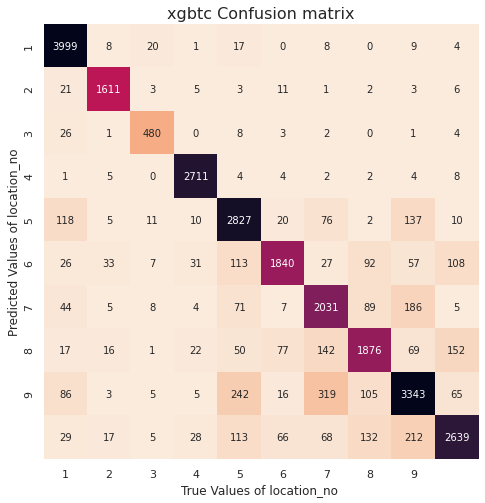

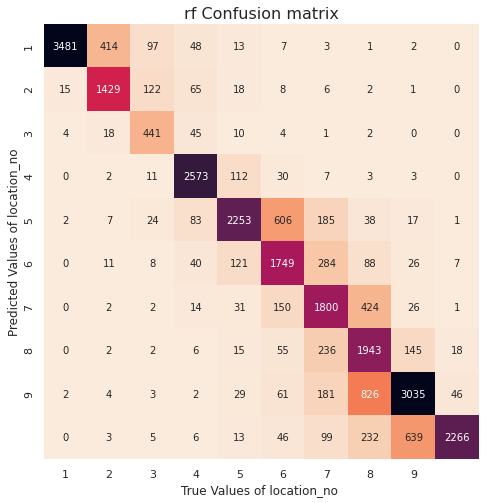

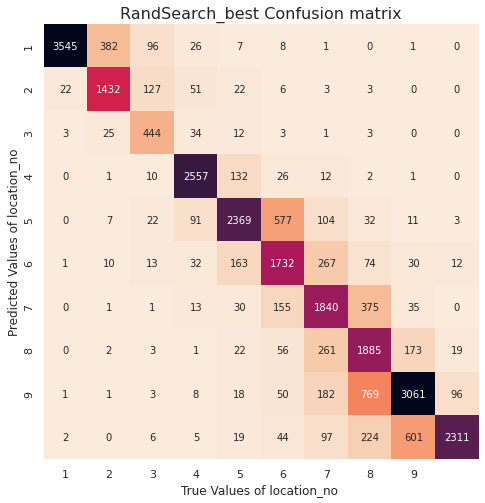

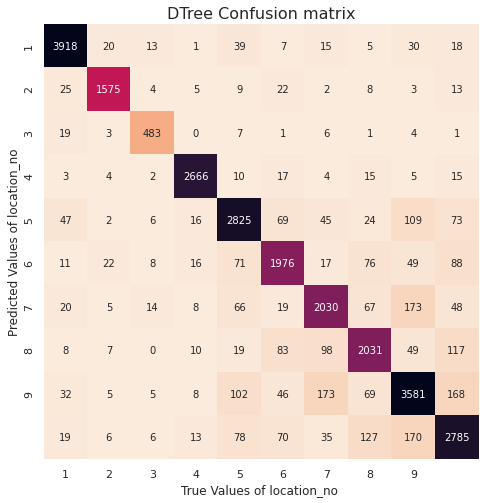

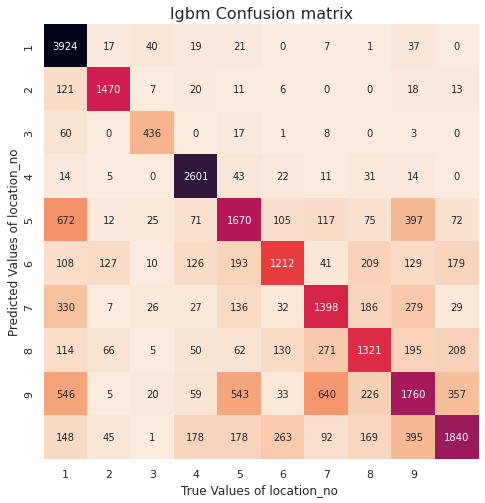

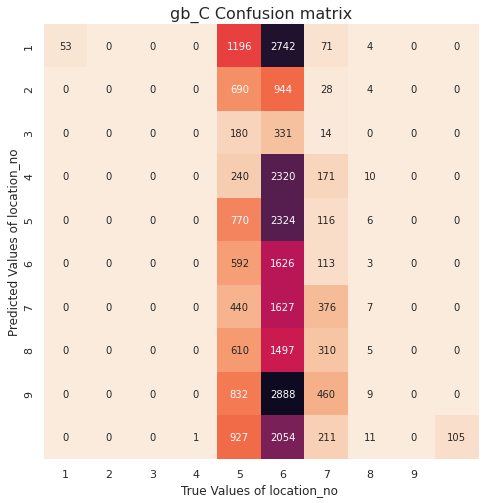

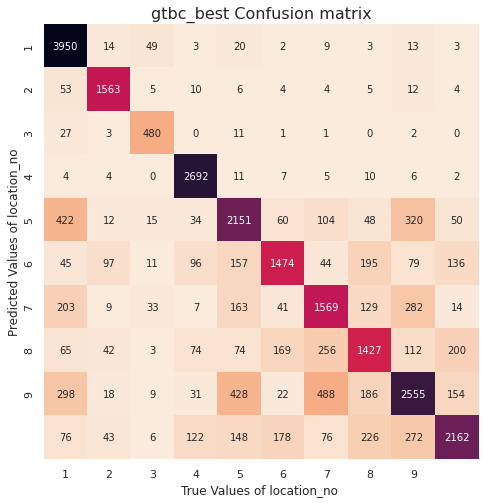

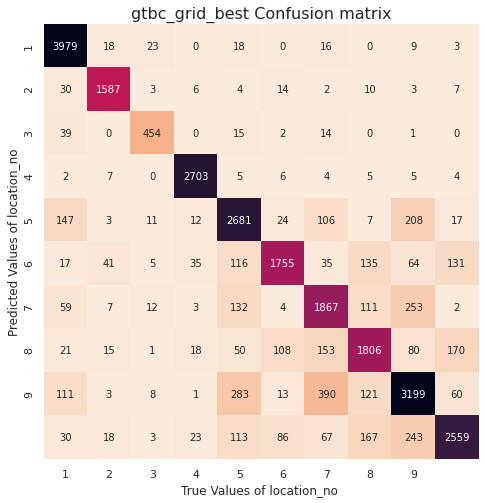

In [25]:
#figsize(5, 5)
#columns=sk_results_small.columns
pre_targets='location_no'#'floor_no' #0-4
sample='15m'
color="rocket_r" #"flare"

#color = "YlGnBu"
sk_results_small=pd.read_csv('DB/result/sk_allData_resample_'+sample+'_'+pre_targets+'.csv')

if pre_targets=='location_no':
    print("result of location")
    for i, each in enumerate(sk_results_small.columns):
        sk_results_small.loc[(sk_results_small[each] <1)]=1
        sk_results_small.loc[(sk_results_small[each] >10)]=10
else:
    print("result of floor")
    for i, each in enumerate(sk_results_small.columns):
        sk_results_small.loc[(sk_results_small[each] <0)]=0  #0-4
        sk_results_small.loc[(sk_results_small[each] >4)]=4

print(sk_results_small.columns)

#columns=['adb','DTree','xgbtc','lgbm','rf','RandSearch_best']

columns=['xgbtc','rf','RandSearch_best','DTree','lgbm', 'gb_C', 'gtbc_best', 'gtbc_grid_best']
#lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best, RandSearch_best

print(pd.value_counts(sk_results_small['origin'].values))
size=len(sk_results_small['origin'].values)

if pre_targets=='location_no':
    ticks=[1,2,3,4,5,6,7,8,9]
else:
    ticks=['B2','B1','1','2','3']
for i, each in enumerate(columns):
    print(sk_results_small[each].unique())
    knn_cnf_matrix= confusion_matrix(np.array(sk_results_small['origin']), np.array(sk_results_small[each])).round(3)#,normalize="pred"vmax=int(size/len(ticks))
    plt.figure(figsize=(8,8))
    sns.heatmap(knn_cnf_matrix, square=True, annot=True, cbar=False,cmap=color,fmt='g',vmin=0, vmax=int(size/len(ticks)), xticklabels=ticks, yticklabels=ticks,annot_kws={"size": 10})
    plt.xlabel('True Values of location_no ')
    plt.ylabel('Predicted Values of location_no')
    plt.savefig('./images/cf/'+pre_targets+sample+each+'.png',dpi=500)
    plt.title(each+' Confusion matrix', size = 16);

In [432]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


pre_targets='floor_no' #0-4
sample='5m'

sk_results_small=pd.read_csv('DB/result/sk_allData_resample_'+sample+'_'+pre_targets+'.csv')
columns=['xgbtc','rf','RandSearch_best','DTree','lgbm']


fpr = dict()
tpr = dict()
roc_auc = dict()

#n_classes = len(sk_results_small['origin'])
y_test=sk_results_small['origin']
y_score=sk_results_small['rf']

#macro_roc_auc_ovo = roc_auc_score(y_test, y_score, multi_class="ovo", average="macro")

macro_roc_auc_ovo = roc_auc_score(y_test, y_score, multi_class="ovo", average="macro")

print(macro_roc_auc_ovo)

probabilities = model.predict_proba(test[["gpa"]])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:,1])
print(thresholds)
plt.plot(fpr, tpr)
plt.show()

#y_test = label_binarize(y_test, classes=[0, 1, 2,3,4])

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label='your_label')
#     roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_auc_score(y_test, y_score,multi_class='ovo')
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()